In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re,string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import numpy as np

In [2]:
df = pd.read_csv('spam_ham_category.csv')
df

,Unnamed: 0,Category,Message
0,0,ham,Good Morning my Dear........... Have a great &...
1,1,ham,Ugh I don't wanna get out of bed. It's so warm.
2,2,ham,You should change your fb to jaykwon thuglyfe ...
3,3,ham,Ok I'm gonna head up to usf in like fifteen mi...
4,4,spam,Congratulations ur awarded 500 of CD vouchers ...
...,...,...,...
1490,1490,spam,PRIVATE! Your 2003 Account Statement for 07808...
1491,1491,ham,Let there be snow. Let there be snow. This kin...
1492,1492,spam,You have WON a guaranteed £1000 cash or a £200...
1493,1493,spam,Hack Chat. Get backdoor entry into 121 chat ro...


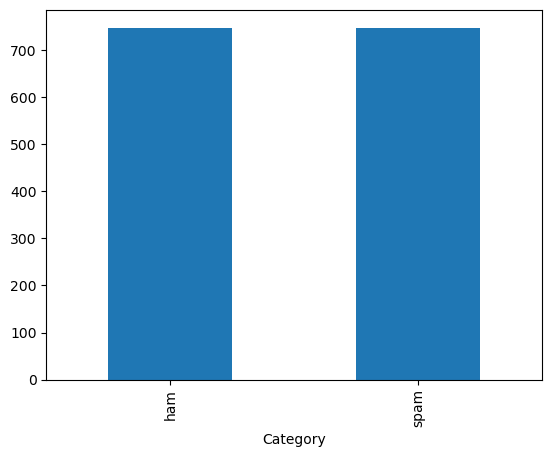

In [3]:
df.groupby('Category').Message.count().plot.bar(ylim = 0)

plt.show()

In [22]:
spam_length = (df['Category'] == ('spam')).sum()
print(spam_length)


747


In [37]:
# Create a boolean series where each 'ham' entry is True
is_ham = df['Category'] == 'ham'

# Filter the DataFrame to keep only 'ham' entries
ham_df = df[is_ham]

# Take the first 748 entries of the filtered DataFrame
ham_reduced = ham_df.iloc[0:748]
ham_reduced


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
884,ham,Dude we should go sup again
885,ham,Yoyyooo u know how to change permissions for a...
886,ham,Gibbs unsold.mike hussey
887,ham,I like to talk pa but am not able to. I dont k...


In [38]:
# Create a boolean series where each 'ham' entry is True
is_spam = df['Category'] == 'spam'

# Filter the DataFrame to keep only 'ham' entries
spam_df = df[is_spam]

# Take the first 748 entries of the filtered DataFrame
spam_reduced = spam_df.iloc[0:748]
spam_reduced


,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [42]:
result = pd.concat([ham_reduced, spam_reduced], axis = 0, ignore_index=True)
result

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,ham,Even my brother is not like to speak with me. ...
...,...,...
1490,spam,Want explicit SEX in 30 secs? Ring 02073162414...
1491,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
1492,spam,Had your contract mobile 11 Mnths? Latest Moto...
1493,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [47]:
result = result.sample(frac=1).reset_index(drop=True)
result.to_csv('spam_ham_category.csv')
result

,Category,Message
0,ham,Good Morning my Dear........... Have a great &...
1,ham,Ugh I don't wanna get out of bed. It's so warm.
2,ham,You should change your fb to jaykwon thuglyfe ...
3,ham,Ok I'm gonna head up to usf in like fifteen mi...
4,spam,Congratulations ur awarded 500 of CD vouchers ...
...,...,...
1490,spam,PRIVATE! Your 2003 Account Statement for 07808...
1491,ham,Let there be snow. Let there be snow. This kin...
1492,spam,You have WON a guaranteed £1000 cash or a £200...
1493,spam,Hack Chat. Get backdoor entry into 121 chat ro...


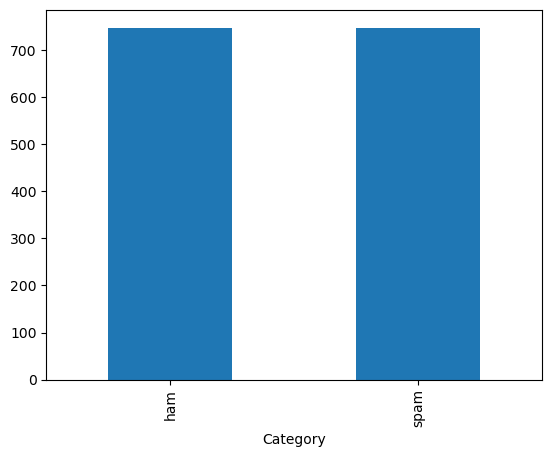

In [48]:
result.groupby('Category').Message.count().plot.bar(ylim = 0)

plt.show()

In [49]:
stemmer = PorterStemmer()

In [50]:
nltk.download('stopwords')
words = stopwords.words("english")
result['cleaned'] = result['Message'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]))
result

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Message,cleaned
0,ham,Good Morning my Dear........... Have a great &...,good morn dear have great amp success day
1,ham,Ugh I don't wanna get out of bed. It's so warm.,ugh i wanna get bed it warm
2,ham,You should change your fb to jaykwon thuglyfe ...,you chang fb jaykwon thuglyf falconerf
3,ham,Ok I'm gonna head up to usf in like fifteen mi...,ok i gonna head usf like fifteen minut
4,spam,Congratulations ur awarded 500 of CD vouchers ...,congratul ur award cd voucher gift guarante fr...
...,...,...,...
1490,spam,PRIVATE! Your 2003 Account Statement for 07808...,privat your account statement xxxxxx show un r...
1491,ham,Let there be snow. Let there be snow. This kin...,let snow let snow thi kind weather bring ppl t...
1492,spam,You have WON a guaranteed £1000 cash or a £200...,you won guarante cash prize to claim yr prize ...
1493,spam,Hack Chat. Get backdoor entry into 121 chat ro...,hack chat get backdoor entri chat room fractio...


In [51]:
result = result[['Category', 'cleaned']]
result

,Category,cleaned
0,ham,good morn dear have great amp success day
1,ham,ugh i wanna get bed it warm
2,ham,you chang fb jaykwon thuglyf falconerf
3,ham,ok i gonna head usf like fifteen minut
4,spam,congratul ur award cd voucher gift guarante fr...
...,...,...
1490,spam,privat your account statement xxxxxx show un r...
1491,ham,let snow let snow thi kind weather bring ppl t...
1492,spam,you won guarante cash prize to claim yr prize ...
1493,spam,hack chat get backdoor entri chat room fractio...


In [54]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

vectorizer = TfidfVectorizer()
X = result['cleaned']
Y = result['Category']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)
#creating pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])
model = pipeline.fit(X_train, y_train)

In [55]:
y_test.iloc[7:8]

757    spam
Name: Category, dtype: object

In [56]:
predict = model.predict(X_test.iloc[7:8])
predict

array(['spam'], dtype=object)

In [67]:
data = {'Message': [input('Enter the message = ')] for i in range(1)}
data = pd.DataFrame(data)
data
predict = model.predict(data['Message'])
predict[0]

Enter the message = Let there be snow. Let there be snow. This kin.


'ham'

In [63]:
from sklearn.metrics import accuracy_score
predict = model.predict(X_test)
print(accuracy_score(y_test,predict)*100)
print('\n')


98.22222222222223




In [66]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(model.predict(X_test),ytest))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       111
        spam       0.98      0.98      0.98       114

    accuracy                           0.98       225
   macro avg       0.98      0.98      0.98       225
weighted avg       0.98      0.98      0.98       225

[[109   2]
 [  2 112]]
